In [ ]:
#Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

In [ ]:
user_df = pd.read_csv(r'/content/user_data.csv')
problem_df = pd.read_csv(r'/content/problem_data.csv')
train_submussion_df = pd.read_csv(r'/content/train_submissions.csv')
test_submussion_df = pd.read_csv(r'/content/test_submissions_NeDLEvX.csv')

In [ ]:
#lets look at the sample data for each of the data frame. Sample data for user data
user_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [ ]:
#count of null values
user_df.isna().sum()

user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64

In [ ]:
#percentage of null values
user_df.isnull().mean()

user_id                      0.000000
submission_count             0.000000
problem_solved               0.000000
contribution                 0.000000
country                      0.322879
follower_count               0.000000
last_online_time_seconds     0.000000
max_rating                   0.000000
rating                       0.000000
rank                         0.000000
registration_time_seconds    0.000000
dtype: float64

In [ ]:
#creating bins for submission counts
submission_count_bins = pd.qcut(user_df["submission_count"], 4,labels = False)

#creating the new column for quantiled submission count
user_df["submission_count_bins"] = submission_count_bins.values

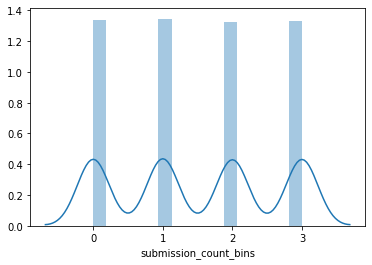

In [ ]:
#Let's have a look at the distribution for submission count bins
sns.distplot(user_df["submission_count_bins"])

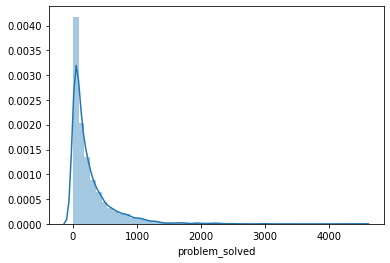

In [ ]:
#plotting problem solved counts
sns.distplot(user_df["problem_solved"])

In [ ]:
#plotting problem solved counts
user_df['problem_solved'].quantile([.2, .4,.6, .8])

0.2     40.0
0.4    100.0
0.6    207.0
0.8    422.0
Name: problem_solved, dtype: float64

In [ ]:
#quantiling the problem solved counts
problem_solved_bins = pd.qcut(user_df["problem_solved"], 5,labels = False)

#creating bins for problem solved counts
user_df["problem_solved_bins"] = problem_solved_bins.values

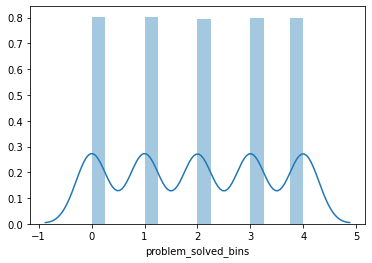

In [ ]:
#let's look at the distribution of the problem solved bins
sns.distplot(user_df["problem_solved_bins"])

In [ ]:
#let's have a look at the new column for problem solved bins
user_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,submission_count_bins,problem_solved_bins
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,0,0
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325,0,1
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603,2,2
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417,3,4
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498,3,4


In [ ]:
#looks like problem solved count bins and submission count bins are identical. So I will check them once if they are idential
user_df['submission_count_bins'].equals(user_df['problem_solved_bins'])

False

In [ ]:
#define success rate as a column
user_df['success_rate'] = user_df['problem_solved']/user_df['submission_count']*100

In [ ]:
#Getting all the ratios
country_data = (user_df["country"].value_counts()/user_df["country"].count())

In [ ]:
#imputing missing values
user_df["country"]= user_df["country"].fillna(pd.Series(np.random.choice(country_data.index,p=country_data.values, size=len(user_df))))

Country is a categorical feature and there are 79 levels. I would like to keep the levels to 10. So, I will keep the first 9 countries by count and the rest of the countries will be put under "other"

In [ ]:
country_list = user_df['country'].value_counts().index[:9]
user_df['country_new'] = np.where(user_df['country'].isin(country_list), user_df['country'], 'Other')

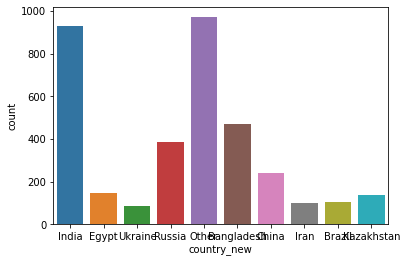

In [ ]:
#Now let's look at the countries distribution
sns.countplot(user_df["country_new"])

In [ ]:
#creating bins for submission counts
follower_count_bins = pd.qcut(user_df["follower_count"], 5,labels = False)
#creating the new column for quantiled submission count
user_df["follower_count_bins"] = follower_count_bins.values

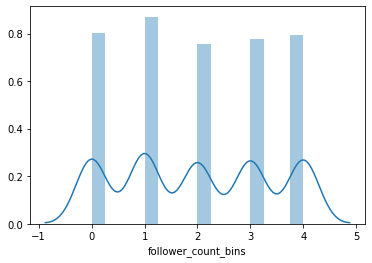

In [ ]:
#Let's have a look at the new distribution
sns.distplot(user_df["follower_count_bins"])

In [ ]:
#let's find the age of the user in the platform in months
user_df["age_in_platform"] = (user_df["last_online_time_seconds"] - user_df["registration_time_seconds"])/(24*3600*30)

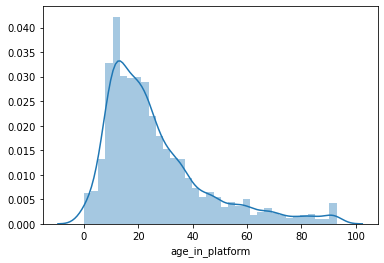

In [ ]:
sns.distplot(user_df["age_in_platform"])

In [ ]:
#creating bins for max_rating counts
max_rating_bins = pd.qcut(user_df["max_rating"], 4,labels = False)

In [ ]:
#creating the new column for quantiled max_rating count
user_df["max_rating_bins"] = max_rating_bins.values

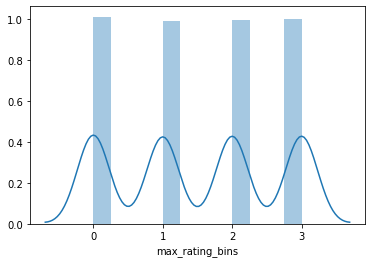

In [ ]:
#plotting max_rating counts
sns.distplot(user_df["max_rating_bins"])

In [ ]:
user_df.columns

Index(['user_id', 'submission_count', 'problem_solved', 'contribution',
       'country', 'follower_count', 'last_online_time_seconds', 'max_rating',
       'rating', 'rank', 'registration_time_seconds', 'submission_count_bins',
       'problem_solved_bins', 'success_rate', 'country_new',
       'follower_count_bins', 'age_in_platform', 'max_rating_bins'],
      dtype='object')

In [ ]:
#70% values are 0, so we can drop this field
user_df.drop(columns = ["contribution"],axis = 1, inplace = True)

In [ ]:
#drop country as we have a new field for country with 'Other'
user_df.drop(columns = ["country"],axis = 1, inplace = True)

In [ ]:
#registration time in years
user_df["registration_time"] = (time.time()-user_df["registration_time_seconds"])/(3600*24*365)

In [ ]:
#last online time in years
user_df["last_online_time"] = (time.time()-user_df["last_online_time_seconds"])/(3600*24*365)

In [ ]:
#drop last_online_time_seconds and registration_time_seconds as we have new fields for them
user_df.drop(columns = ["last_online_time_seconds","registration_time_seconds"],axis = 1, inplace = True)

In [ ]:
#change values of country_new using a label encoder
labelencoder = LabelEncoder()
user_df['country_new'] = labelencoder.fit_transform(user_df['country_new'])

In [ ]:
#change values of rank to numeric
rank_dict = {'beginner':0, 'intermediate':1, 'advanced':2, 'expert':3}
user_df["rank"] = user_df["rank"].apply(lambda x: rank_dict[x])

In [ ]:
user_df.head()

,user_id,submission_count,problem_solved,follower_count,max_rating,rating,rank,submission_count_bins,problem_solved_bins,success_rate,country_new,follower_count_bins,age_in_platform,max_rating_bins,registration_time,last_online_time
0,user_3311,47,40,4,348.337,330.849,1,0,0,85.106383,4,1,14.438738,1,4.185847,2.999102
1,user_3028,63,52,17,405.677,339.450,1,0,1,82.539683,4,2,22.031188,2,4.972032,3.161249
2,user_2268,226,203,24,307.339,284.404,0,2,2,89.823009,3,3,19.791068,0,4.579646,2.952983
3,user_480,611,490,94,525.803,471.330,2,3,4,80.196399,9,4,59.620788,3,7.863106,2.962767
4,user_650,504,479,4,548.739,486.525,2,3,4,95.039683,8,1,38.986472,3,6.441236,3.236868


In [ ]:
#lets look at the sample data for problem data.
problem_df.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [ ]:
#I will fill up the values based on the ratio of distribution
#Getting all the ratios
level_type_data = (problem_df["level_type"].value_counts()/problem_df["level_type"].count())

#imputing missing values
problem_df["level_type_new"]= problem_df["level_type"].fillna(pd.Series(np.random.choice(level_type_data.index,p=level_type_data.values, size=len(problem_df))))

In [ ]:
#Now I will have to label the level_type_new field
level_type_dict = {'A':0, 'B':1, 'C':2, 'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13}
problem_df["level_type_new"] = problem_df["level_type_new"].apply(lambda x: level_type_dict[x])

In [ ]:
print(problem_df["points"].mean())
print(problem_df["points"].mode())
print(problem_df["points"].median())

1452.3818043395509
0    500.0
dtype: float64
1500.0


In [ ]:
problem_df.head()

,problem_id,level_type,points,tags,level_type_new
0,prob_3649,H,NaN,NaN,7
1,prob_6191,A,NaN,NaN,0
2,prob_2020,F,NaN,NaN,5
3,prob_313,A,500.0,"greedy,implementation",0
4,prob_101,A,500.0,"constructive algorithms,greedy,math",0


In [ ]:
#imputing missing points values
problem_df["points"]= problem_df["points"].fillna(problem_df["points"].mean())
#I will fill up the values based on the ratio of distribution
#Getting all the ratios
#points_data = (problem_df["points"].value_counts()/problem_df["points"].count())

#imputing missing values for points
#problem_df["points"]= problem_df["points"].fillna(pd.Series(np.random.choice(points_data.index,p=points_data.values, size=len(problem_df))))

In [ ]:
#I will remove level_type as there is a new field for that. tags should be removed as they have more than 50% null values
problem_df.drop(columns = ["level_type","tags"],axis = 1, inplace = True)

In [ ]:
#merge train submission and user data
train_df = pd.merge(train_submussion_df,user_df,how = 'left',on = "user_id")
test_df = pd.merge(test_submussion_df,user_df,how = 'left',on = "user_id")

In [ ]:
#merge train data and problem data
train_df = pd.merge(train_df,problem_df,how = 'left',on = "problem_id")
test_df = pd.merge(test_df,problem_df,how = 'left',on = "problem_id")

In [ ]:
#create ID field for train data, ID already there for test data
train_df["ID"] = train_df["user_id"] + train_df["problem_id"]

In [ ]:
train_df.head().shape

(5, 21)

In [ ]:
test_df.head().shape

(5, 20)

In [ ]:
#user_id count - number of times user is appearing
train_df['user_id_count'] = train_df.groupby('user_id')['user_id'].transform('count')
test_df['user_id_count'] = train_df.groupby('user_id')['user_id'].transform('count')

In [ ]:
#problem_id count - number of times problem is appearing
train_df['problem_id_count'] = train_df.groupby('problem_id')['problem_id'].transform('count')
test_df['problem_id_count'] = train_df.groupby('problem_id')['problem_id'].transform('count')

In [ ]:
#user id min attempts
train_df['user_id_min_attempts'] = train_df.groupby('user_id')['attempts_range'].transform('min')
test_df['user_id_min_attempts'] = train_df.groupby('user_id')['attempts_range'].transform('min')

In [ ]:
#user id max attempts
train_df['user_id_max_attempts'] = train_df.groupby('user_id')['attempts_range'].transform('max')
test_df['user_id_max_attempts'] = train_df.groupby('user_id')['attempts_range'].transform('max')

In [ ]:
#user id mean attempts
train_df['user_id_mean_attempts'] = train_df.groupby('user_id')['attempts_range'].transform('mean')
test_df['user_id_mean_attempts'] = train_df.groupby('user_id')['attempts_range'].transform('mean')

In [ ]:
#problem id min attempts
train_df['problem_id_min_attempts'] = train_df.groupby('problem_id')['attempts_range'].transform('min')
test_df['problem_id_min_attempts'] = train_df.groupby('problem_id')['attempts_range'].transform('min')

In [ ]:
#problem id max attempts
train_df['problem_id_max_attempts'] = train_df.groupby('problem_id')['attempts_range'].transform('max')
test_df['problem_id_max_attempts'] = train_df.groupby('problem_id')['attempts_range'].transform('max')

In [ ]:
#problem id mean attempts
train_df['problem_id_mean_attempts'] = train_df.groupby('problem_id')['attempts_range'].transform('mean')
test_df['problem_id_mean_attempts'] = train_df.groupby('problem_id')['attempts_range'].transform('mean')

In [ ]:
#user id min level
train_df['user_id_min_level'] = train_df.groupby('user_id')['level_type_new'].transform('min')
test_df['user_id_min_level'] = train_df.groupby('user_id')['level_type_new'].transform('min')

In [ ]:
#user id max level
train_df['user_id_max_level'] = train_df.groupby('user_id')['level_type_new'].transform('max')
test_df['user_id_max_level'] = train_df.groupby('user_id')['level_type_new'].transform('max')

In [ ]:
#user id mean level
train_df['user_id_mean_level'] = train_df.groupby('user_id')['level_type_new'].transform('mean')
test_df['user_id_mean_level'] = train_df.groupby('user_id')['level_type_new'].transform('mean')

In [ ]:
train_df['country_percent'] = train_df.groupby('country_new')['country_new'].transform('count')/len(train_df)
test_df['country_percent'] = train_df.groupby('country_new')['country_new'].transform('count')/len(train_df)

In [ ]:
print(train_df.columns.shape)
print(test_df.columns.shape)

(33,)
(32,)


In [ ]:
train_df.head()

,user_id,problem_id,attempts_range,submission_count,problem_solved,follower_count,max_rating,rating,rank,submission_count_bins,problem_solved_bins,success_rate,country_new,follower_count_bins,age_in_platform,max_rating_bins,registration_time,last_online_time,points,level_type_new,ID,user_id_count,problem_id_count,user_id_min_attempts,user_id_max_attempts,user_id_mean_attempts,problem_id_min_attempts,problem_id_max_attempts,problem_id_mean_attempts,user_id_min_level,user_id_max_level,user_id_mean_level,country_percent
0,user_232,prob_6507,1,53,47,1,307.913,206.709,0,0,1,88.679245,0,0,27.593689,0,5.282229,3.014255,1000.0,1,user_232prob_6507,31,15,1,6,1.870968,1,3,2.000000,0,3,0.612903,0.131988
1,user_3568,prob_2994,3,133,118,0,324.255,235.378,0,1,2,88.721805,4,0,18.339394,1,4.567063,3.059716,1500.0,2,user_3568prob_2994,44,132,1,5,2.272727,1,5,1.590909,0,4,0.659091,0.258360
2,user_1600,prob_5071,1,50,44,7,343.177,229.358,0,0,1,88.000000,4,1,12.048098,1,3.970080,2.979825,500.0,0,user_1600prob_5071,27,1365,1,4,1.666667,1,6,1.598535,0,1,0.444444,0.258360
3,user_2256,prob_703,1,271,233,40,436.927,399.083,1,2,3,85.977860,7,3,22.159904,2,4.786741,2.965379,500.0,0,user_2256prob_703,56,403,1,5,1.607143,1,5,1.290323,0,4,1.089286,0.272662
4,user_2321,prob_356,1,155,135,80,492.546,472.190,2,1,2,87.096774,4,4,26.117744,3,5.104219,2.957555,2000.0,3,user_2321prob_356,68,12,1,5,1.529412,1,3,2.000000,0,8,2.161765,0.258360


In [ ]:
#define X
X = train_df.drop(columns=['user_id','problem_id','ID','attempts_range'],axis=1)



In [ ]:
test_df.head()

,ID,user_id,problem_id,submission_count,problem_solved,follower_count,max_rating,rating,rank,submission_count_bins,problem_solved_bins,success_rate,country_new,follower_count_bins,age_in_platform,max_rating_bins,registration_time,last_online_time,points,level_type_new,user_id_count,problem_id_count,user_id_min_attempts,user_id_max_attempts,user_id_mean_attempts,problem_id_min_attempts,problem_id_max_attempts,problem_id_mean_attempts,user_id_min_level,user_id_max_level,user_id_mean_level,country_percent
0,user_856_prob_5822,user_856,prob_5822,274,231,35,393.062,362.959,1,2,3,84.306569,4,3,31.277303,2,5.597672,3.026934,1452.381804,11,31,15,1,6,1.870968,1,3,2.000000,0,3,0.612903,0.131988
1,user_2642_prob_2334,user_2642,prob_2334,124,114,8,307.053,146.502,0,1,2,91.935484,4,1,25.299704,0,5.032393,2.952966,500.000000,0,44,132,1,5,2.272727,1,5,1.590909,0,4,0.659091,0.258360
2,user_2557_prob_2920,user_2557,prob_2920,367,283,76,321.674,241.399,0,2,3,77.111717,0,4,42.214172,1,6.422016,2.952358,500.000000,0,27,1365,1,4,1.666667,1,6,1.598535,0,1,0.444444,0.258360
3,user_1572_prob_4598,user_1572,prob_4598,203,181,29,473.050,454.989,1,2,2,89.162562,7,3,31.399209,3,5.605323,3.024567,1000.000000,1,56,403,1,5,1.607143,1,5,1.290323,0,4,1.089286,0.272662
4,user_295_prob_6139,user_295,prob_6139,113,89,3,455.275,448.108,1,1,1,78.761062,7,1,15.541807,3,4.579969,3.302560,500.000000,0,68,12,1,5,1.529412,1,3,2.000000,0,8,2.161765,0.258360


In [ ]:
#define y
y = train_df["attempts_range"]

In [ ]:
#split training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#xgb bseline model
xgbC = XGBClassifier(n_estimators= 300)

In [ ]:
xgbC.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_test_pred = xgbC.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.5900216361013806

In [ ]:
f1_score(y_test, y_test_pred, average='weighted')

0.5421888168577286

In [ ]:
#define X
test_1 = test_df.drop(columns=['user_id','problem_id','ID'],axis=1)

In [ ]:
test_1.head()

,submission_count,problem_solved,follower_count,max_rating,rating,rank,submission_count_bins,problem_solved_bins,success_rate,country_new,follower_count_bins,age_in_platform,max_rating_bins,registration_time,last_online_time,points,level_type_new,user_id_count,problem_id_count,user_id_min_attempts,user_id_max_attempts,user_id_mean_attempts,problem_id_min_attempts,problem_id_max_attempts,problem_id_mean_attempts,user_id_min_level,user_id_max_level,user_id_mean_level,country_percent
0,274,231,35,393.062,362.959,1,2,3,84.306569,4,3,31.277303,2,5.597672,3.026934,1452.381804,11,31,15,1,6,1.870968,1,3,2.000000,0,3,0.612903,0.131988
1,124,114,8,307.053,146.502,0,1,2,91.935484,4,1,25.299704,0,5.032393,2.952966,500.000000,0,44,132,1,5,2.272727,1,5,1.590909,0,4,0.659091,0.258360
2,367,283,76,321.674,241.399,0,2,3,77.111717,0,4,42.214172,1,6.422016,2.952358,500.000000,0,27,1365,1,4,1.666667,1,6,1.598535,0,1,0.444444,0.258360
3,203,181,29,473.050,454.989,1,2,2,89.162562,7,3,31.399209,3,5.605323,3.024567,1000.000000,1,56,403,1,5,1.607143,1,5,1.290323,0,4,1.089286,0.272662
4,113,89,3,455.275,448.108,1,1,1,78.761062,7,1,15.541807,3,4.579969,3.302560,500.000000,0,68,12,1,5,1.529412,1,3,2.000000,0,8,2.161765,0.258360


In [ ]:
test_df['attempts_range'] = xgbC.predict(test_1)

In [ ]:
test_df.head()

,ID,user_id,problem_id,submission_count,problem_solved,follower_count,max_rating,rating,rank,submission_count_bins,problem_solved_bins,success_rate,country_new,follower_count_bins,age_in_platform,max_rating_bins,registration_time,last_online_time,points,level_type_new,user_id_count,problem_id_count,user_id_min_attempts,user_id_max_attempts,user_id_mean_attempts,problem_id_min_attempts,problem_id_max_attempts,problem_id_mean_attempts,user_id_min_level,user_id_max_level,user_id_mean_level,country_percent,attempts_range
0,user_856_prob_5822,user_856,prob_5822,274,231,35,393.062,362.959,1,2,3,84.306569,4,3,31.277303,2,5.597672,3.026934,1452.381804,11,31,15,1,6,1.870968,1,3,2.000000,0,3,0.612903,0.131988,2
1,user_2642_prob_2334,user_2642,prob_2334,124,114,8,307.053,146.502,0,1,2,91.935484,4,1,25.299704,0,5.032393,2.952966,500.000000,0,44,132,1,5,2.272727,1,5,1.590909,0,4,0.659091,0.258360,2
2,user_2557_prob_2920,user_2557,prob_2920,367,283,76,321.674,241.399,0,2,3,77.111717,0,4,42.214172,1,6.422016,2.952358,500.000000,0,27,1365,1,4,1.666667,1,6,1.598535,0,1,0.444444,0.258360,1
3,user_1572_prob_4598,user_1572,prob_4598,203,181,29,473.050,454.989,1,2,2,89.162562,7,3,31.399209,3,5.605323,3.024567,1000.000000,1,56,403,1,5,1.607143,1,5,1.290323,0,4,1.089286,0.272662,1
4,user_295_prob_6139,user_295,prob_6139,113,89,3,455.275,448.108,1,1,1,78.761062,7,1,15.541807,3,4.579969,3.302560,500.000000,0,68,12,1,5,1.529412,1,3,2.000000,0,8,2.161765,0.258360,1


In [ ]:
test_2 = test_df[['ID','attempts_range']]

In [ ]:
test_2.head()

,ID,attempts_range
0,user_856_prob_5822,2
1,user_2642_prob_2334,2
2,user_2557_prob_2920,1
3,user_1572_prob_4598,1
4,user_295_prob_6139,1


In [ ]:
output = test_2.to_csv('attempts.csv', index=False)